In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [70]:
file= 'C://Kamalatweets_clean_P.csv' #insert local path between //

In [71]:
#creating list of seperate tweets

def tweet_list(file):
    with open(file, mode='r', encoding='utf-8') as f:
        reader = f.read()
    tweets = reader.strip().split('\n')
    tweets = [tweet.strip() for tweet in tweets if tweet.strip()]
   
    return tweets

tweets_list = tweet_list(file)

# Loading the tweets as a panda-dataframe
df = pd.DataFrame(tweets_list, columns=['tweets'])

print(df)

                                                 tweets
0                                                  text
1     vp every american must freedom live safe gun v...
2                                         people always
3     hea full todayfull gratitude trust placed full...
4     adage dark enough see stars know many people f...
...                                                 ...
1001  fight future continue count strength determina...
1002  unions strong america strong im back pennsylva...
1003  good labor leaders detroit today generations b...
1004            president pass pro act end unionbusting
1005  vp today potus met us hostage deal negotiation...

[1006 rows x 1 columns]


Simple statistics

In [72]:
df['word_count'] = df['tweets'].apply(lambda x: len(x.split()))


print(df['word_count'].describe())


count    1006.000000
mean       16.557654
std        14.295188
min         1.000000
25%         9.000000
50%        15.000000
75%        21.000000
max       175.000000
Name: word_count, dtype: float64


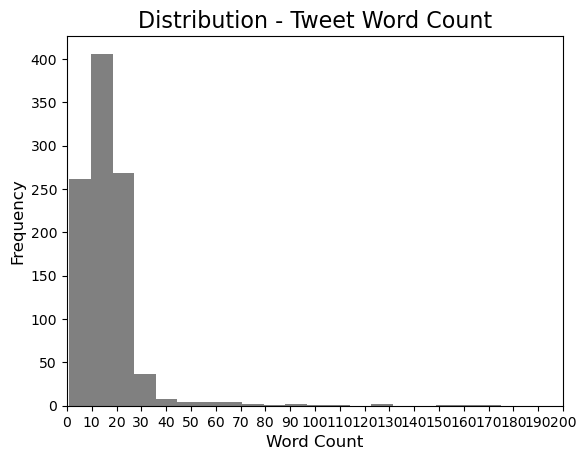

In [ ]:
# Plot a histogram, source: https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf#NMF
plt.hist(
    df['word_count'],
    bins=20,
    color='grey'
)

plt.title('Distribution - Tweet Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.xlim(0, 100)
plt.xticks(np.arange(0, 201, 10))

plt.show()

In [74]:
# All unique words in one list (inspiration from the same source as above "kaggle" but rewrote some of the code)
p_text = df['tweets'].apply(lambda x: x.split())
p_text = [item for sublist in p_text for item in sublist]

word_counts = {}
for word in p_text:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sorting the words by frequency and selecting the top 20 words
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Convert to DataFrame
top_20 = pd.DataFrame(sorted_word_counts, columns=['word', 'frequency'])

print(top_20)

         word  frequency
0       trump        292
1      donald        270
2   president        195
3      people        158
4        make        155
5        plan        120
6        vote        115
7          us        113
8    election        110
9   americans        105
10       care        101
11    america         95
12    country         93
13   american         90
14        get         86
15      fight         86
16     states         74
17       help         74
18        day         73
19      would         72


C:\Users\ellas\AppData\Local\Temp\ipykernel_34440\2545348353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
C:\Users\ellas\AppData\Local\Temp\ipykernel_34440\2545348353.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


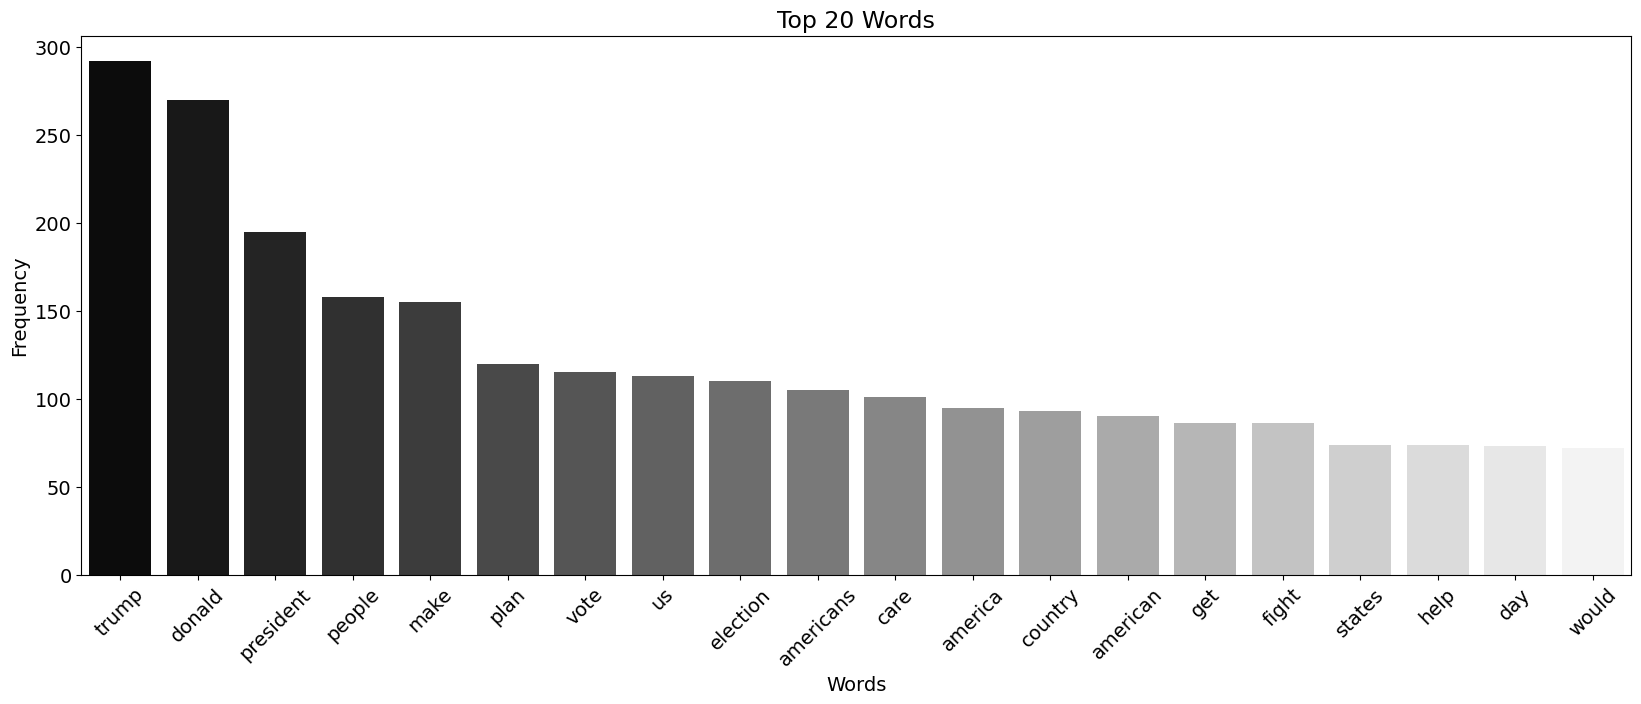

In [75]:
# Bar chart for the top 20 most frequently occuring words (same source "kaggle")
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='grey'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)


plt.show()

Finding semantic list using NMF

In [76]:
documents = df['tweets']
 
# TF-IDF matrix 
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
uniqe_words = vectorizer.get_feature_names_out()

 
# NMF
num_topics = 10 #from coherence score
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_
 
#extracting the top words in each topic
n_top_words = 8
topic_word_lists = []
 
for topic in H:
    top_word_indices = topic.argsort()[::-1][:n_top_words]
    top_words = []
    for i in top_word_indices:
        top_words.append(uniqe_words[i])
    topic_word_lists.append(top_words)

#printing the wordlists 
i = 0
for top_words in topic_word_lists:
    print(top_words)
    i += 1


['donald', 'trump', 'people', 'american', 'would', 'unstable', 'trumps', 'unhinged']
['vote', 'make', 'election', 'voice', 'day', 'days', 'plan', 'heard']
['care', 'health', 'medicare', 'affordable', 'seniors', 'cover', 'home', 'act']
['president', 'states', 'united', 'law', 'sign', 'restore', 'bill', 'passes']
['women', 'aboion', 'decisions', 'trump', 'bodies', 'bans', 'trust', 'make']
['helene', 'hurricane', 'communities', 'vp', 'help', 'recover', 'local', 'need']
['win', 'fight', 'help', 'work', 'us', 'hard', 'love', 'promise']
['middle', 'class', 'strong', 'working', 'come', 'families', 'america', 'never']
['page', 'turn', 'forward', 'new', 'way', 'cha', 'us', 'together']
['americans', 'tax', 'plan', 'small', 'million', 'economy', 'business', 'economic']


In [77]:
# Calculating the Frobenius norm value. 
reconstructed_matrix = np.dot(W, H)  # Multiply W and H to reconstruct the original matrix
frob_norm = np.linalg.norm(tfidf_matrix - reconstructed_matrix, ord='fro')  

print(f"Frobenius Norm (Reconstruction Error): {frob_norm:.4f}")

Frobenius Norm (Reconstruction Error): 30.1222
